Every implementation of machine learning algorithms has the same basic components. These same principles will be used in this project, viz;
- Data collection, that is defining the problem and assembling a dataset
- Data preparation
- Choose model
- Create the model
- Train model, that is developing a model that does better than a baseline
- Evaluate model, that is choosing a measure of success and deciding on an evaluation protocol
- Parameter tuning, that is regularizing the model and tuning the parameters
- Prediction

# Data Collection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
%matplotlib inline
import seaborn as sns
from scipy import stats as ss
from scipy.stats import norm
import re
import warnings;warnings.filterwarnings("ignore")

In [2]:
xdata=pd.read_csv("Rent.csv")

In [3]:
xdata.columns = ["Applied", "Gender", "Payment_Method","Area",
               "Received", "Id", "Reason", "Date", "Age", "Location","True_False"]

In [4]:
xdata.head()

Applied Gender Payment_Method Area Received            Id Reason  \
0  $775.00      F             AV    O  $775.00  GHI001721881     RA   
1  $325.00      M             AV    S  $325.00  GHI000270611     RA   
2  $325.00      M             AV    S  $325.00  GHI000270611     RA   
3  $350.00      F             AV   BP  $350.00  GHI000761091     RA   
4  $550.00      F             AV   BP  $550.00  GHI000761091     RA   

        Date    Age Location  True_False  
0  04-Nov-20  25-29       PP           0  
1  14-Jul-17  30-34        O           0  
2  14-Jul-17  30-34        O           0  
3  12-Aug-19  35-39        M           0  
4  21-Nov-19  40-44        M           0

## Separating a Test Dataset and Training Dataset

#### Reason to separate:
Now we will use "data" as the training data as a whole, machine will not know about "xdata". "Xdata" will be used as a alien dataset to which the computer will predict, later we will use it to check the accuracy. It has been done to check how our model will work on real world.

In [5]:
X,Y=xdata[['Applied', 'Gender', 'Payment_Method', 'Location', 'Received', 'Id',
       'Reason', 'Date', 'Age', 'Area']],xdata[['True_False']]

In [6]:
from sklearn.model_selection import train_test_split
traindata, testdata, targetdata, testtargetdata = train_test_split(X, Y, stratify = Y, test_size=0.20, random_state=0)

In [7]:
traindata.head()

Applied Gender Payment_Method Location Received            Id Reason  \
72727    $95.00      M             AV        M   $95.00  GHI001040140     RA   
18166    $90.00      M             AV        U   $90.00  GHI000096195     RA   
18398    $85.00      F             AV        M   $85.00  GHI000873216     RA   
138975  $425.00      F             AV        M  $425.00  GHI000165164     RA   
108258  $450.00      F             AV        M  $450.00  GHI000085542     RA   

             Date    Age Area  
72727   16-Oct-20  25-29    T  
18166   13-May-20  20-24    O  
18398   29-Sep-20  20-24    O  
138975  10-Jul-19  40-44    W  
108258  18-Sep-17  25-29    C

In [8]:
traindata['Reason'].value_counts()

RA    114144
Name: Reason, dtype: int64

In [9]:
targetdata['True_False'].value_counts()

0    113707
1       437
Name: True_False, dtype: int64

In [10]:
testdata['Reason'].value_counts()

RA    28537
Name: Reason, dtype: int64

In [11]:
testtargetdata['True_False'].value_counts()

0    28428
1      109
Name: True_False, dtype: int64

In [12]:
frame=[traindata,targetdata]
data=pd.concat(frame,axis=1)
data

Applied Gender Payment_Method Location Received            Id Reason  \
72727    $95.00      M             AV        M   $95.00  GHI001040140     RA   
18166    $90.00      M             AV        U   $90.00  GHI000096195     RA   
18398    $85.00      F             AV        M   $85.00  GHI000873216     RA   
138975  $425.00      F             AV        M  $425.00  GHI000165164     RA   
108258  $450.00      F             AV        M  $450.00  GHI000085542     RA   
...         ...    ...            ...      ...      ...           ...    ...   
4823    $210.00      F             AV        M  $210.00  GHI001304576     RA   
139400  $480.00      M             AV        M  $480.00  GHI000222992     RA   
94186   $344.00      F             AV        O  $344.12  GHI000722944     RA   
76282   $220.00      F             AV       NE  $220.00  GHI001224192     RA   
82557   $226.00      F             AV       PP  $226.00  GHI000076617     RA   

             Date    Age Area  True_False  
72727   16-Oct-20  25-29    T           0  
18166   13-May-20  20-24    O           0  
18398   29-Sep-20  20-24    O           0  
138975  10-Jul-19  40-44    W           0  
108258  18-Sep-17  25-29    C           0  
...           ...    ...  ...         ...  
4823    08-Sep-17  25-29   BP           0  
139400  27-Oct-20  20-24   EC           0  
94186   28-Feb-17  35-39   AM           0  
76282   28-Aug-17  50-54    W           0  
82557   30-Oct-19  25-29    O           0  

[114144 rows x 11 columns]

In [13]:
frame=[testdata,testtargetdata]
datax=pd.concat(frame,axis=1)
datax

Applied Gender Payment_Method Location Received            Id Reason  \
96163   $524.00      F             RP        O  $524.00  GHI001206283     RA   
91210   $250.00      M             RP       PP  $250.00  GHI000753413     RA   
65529   $136.00      F             AV       NE  $136.00  GHI000112669     RA   
113243  $300.00      F             AV       NE  $300.00  GHI000094993     RA   
87702   $560.00      F             AV        M  $560.00  GHI001536010     RA   
...         ...    ...            ...      ...      ...           ...    ...   
2138    $300.00      F             AV        M  $300.00  GHI001306368     RA   
131172  $940.00      F             AV        M  $940.00  GHI000807686     RA   
81761   $330.00      F             AV        O  $330.00  GHI001418001     RA   
26170   $720.00      M             AV       NE  $720.00  GHI000091148     RA   
76958   $420.00      M             AV        M  $420.00  GHI000079941     RA   

             Date    Age Area  True_False  
96163   09-Jul-18  30-34    O           0  
91210   26-Jun-19  50-54   AM           0  
65529   07-Sep-20  50-54    O           0  
113243  28-Mar-20  30-34   EC           0  
87702   17-May-18  30-34   AM           0  
...           ...    ...  ...         ...  
2138    20-Sep-17  20-24   AM           0  
131172  26-Sep-17  30-34   AM           0  
81761   29-Sep-17  35-39    W           0  
26170   27-Jan-20  50-54    C           0  
76958   04-Sep-19  45-49    W           0  

[28537 rows x 11 columns]

In [14]:
datax.to_csv("Rent_In_Advance_Testset.csv")

In [15]:
data.to_csv("Rent_In_Advance_Trainingset.csv")

# Data Preparation and Feature Engineering
## Adding and Cleaning columns
##### Removing special characters and converting to continous values 

In [16]:
data=pd.read_csv("Rent_In_Advance_Trainingset.csv")

In [17]:
data=data.drop("Unnamed: 0",axis=1)

In [18]:
data.tail()

Applied Gender Payment_Method Location Received            Id Reason  \
114139  $210.00      F             AV        M  $210.00  GHI001304576     RA   
114140  $480.00      M             AV        M  $480.00  GHI000222992     RA   
114141  $344.00      F             AV        O  $344.12  GHI000722944     RA   
114142  $220.00      F             AV       NE  $220.00  GHI001224192     RA   
114143  $226.00      F             AV       PP  $226.00  GHI000076617     RA   

             Date    Age Area  True_False  
114139  08-Sep-17  25-29   BP           0  
114140  27-Oct-20  20-24   EC           0  
114141  28-Feb-17  35-39   AM           0  
114142  28-Aug-17  50-54    W           0  
114143  30-Oct-19  25-29    O           0

In [19]:
data['Applied']=data['Applied'].replace(r'',np.NaN)
data.dropna()
data['Applied']=data['Applied'].replace('[A-Z a-z , / ? \ : " ; $]','' ,regex=True)
data['Applied']=data['Applied'].astype(float)

data['Received']=data['Received'].replace(r'',np.NaN)
data.dropna()

data['Received']=data['Received'].replace('[A-Z a-z , / ? \ : " ; $]','' ,regex=True)
data['Received']=data['Received'].astype(float)

In [20]:
data['Payment_Method'].value_counts()

AV    98803
RP    15337
U         4
Name: Payment_Method, dtype: int64

In [21]:
data["Age"].unique()

array(['25-29', '20-24', '40-44', '50-54', '30-34', '65+', '18-19',
       '35-39', '55-59', '45-49', '60-64', '17', '16'], dtype=object)

In [22]:
mapper = {"16" : "Teenage", "17" : "Teenage", "18-19" : "Adult", "20-24": "Adult",
          "25-29" : "Adult", "30-34" : "MidAge", "35-39" : "MidAge", "40-44" : "MidAge",
          "45-49" : "MidAge", "50-54" : "Old", "55-59" : "Old", "60-64" : "Old", "65+":"Old"}
#Decrease number of age groups as it may decrease our accuracy in classification model.

In [23]:
data["AgeGroup"] = data["Age"].map(mapper)

In [24]:
pmapper = {"AV":"AV","RP":"RPU", "U":"RPU"}

In [25]:
data["Payment_Type"] = data["Payment_Method"].map(pmapper)

In [26]:
data["logapplied"] = pd.Series(np.log(data["Applied"]), index = data.index)
data["logreceived"] = pd.Series(np.log(data["Received"]), index = data.index)

In [27]:
data["Ratio"] = data["Received"]/data["Applied"]

In [28]:
'''
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Year'] = pd.DatetimeIndex(data['Date']).year
data['Month'] = pd.DatetimeIndex(data['Date']).month
data['Day']= pd.DatetimeIndex(data['Date']).day
data['Week_Of_Month']= data['Date'].apply(lambda d: (d.day-1)//7+1)
data['Week_Of_Year']= pd.DatetimeIndex(data['Date']).weekofyear
'''

"\ndata['Date'] = pd.to_datetime(data['Date'], errors='coerce')\ndata['Year'] = pd.DatetimeIndex(data['Date']).year\ndata['Month'] = pd.DatetimeIndex(data['Date']).month\ndata['Day']= pd.DatetimeIndex(data['Date']).day\ndata['Week_Of_Month']= data['Date'].apply(lambda d: (d.day-1)//7+1)\ndata['Week_Of_Year']= pd.DatetimeIndex(data['Date']).weekofyear\n"

In [29]:
def add_datepart(df, fldname, drop=True):
    fld = df[fldname]
    if not np.issubdtype(fld.dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    for n in ('Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start'):
        df[targ_pre+n] = getattr(fld.dt,n.lower())
    df[targ_pre+'Elapsed'] = fld.astype(np.int64) // 10**9
    if drop: df.drop(fldname, axis=1, inplace=True)

## Checking details of dataset
#### Preliminary Data Analysis

In [30]:
data.head()

Applied Gender Payment_Method Location  Received            Id Reason  \
0     95.0      M             AV        M      95.0  GHI001040140     RA   
1     90.0      M             AV        U      90.0  GHI000096195     RA   
2     85.0      F             AV        M      85.0  GHI000873216     RA   
3    425.0      F             AV        M     425.0  GHI000165164     RA   
4    450.0      F             AV        M     450.0  GHI000085542     RA   

        Date    Age Area  True_False AgeGroup Payment_Type  logapplied  \
0  16-Oct-20  25-29    T           0    Adult           AV    4.553877   
1  13-May-20  20-24    O           0    Adult           AV    4.499810   
2  29-Sep-20  20-24    O           0    Adult           AV    4.442651   
3  10-Jul-19  40-44    W           0   MidAge           AV    6.052089   
4  18-Sep-17  25-29    C           0    Adult           AV    6.109248   

   logreceived  Ratio  
0     4.553877    1.0  
1     4.499810    1.0  
2     4.442651    1.0  
3     6.052089    1.0  
4     6.109248    1.0

In [92]:
add_datepart(data, "Date")

KeyError: 'Date'

In [93]:
data.isnull().sum() #checking if there is any null column

Applied             0
Gender              0
Payment_Method      0
Location            0
Received            0
Id                  0
Reason              0
Age                 0
Area                0
True_False          0
AgeGroup            0
Payment_Type        0
logapplied          0
logreceived         0
Ratio               0
Year                0
Month               0
Week                0
Day                 0
Dayofweek           0
Dayofyear           0
Is_month_end        0
Is_month_start      0
Is_quarter_end      0
Is_quarter_start    0
Is_year_end         0
Is_year_start       0
Elapsed             0
dtype: int64

In [94]:
data.info() #details about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114144 entries, 0 to 114143
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Applied           114144 non-null  float64
 1   Gender            114144 non-null  object 
 2   Payment_Method    114144 non-null  object 
 3   Location          114144 non-null  object 
 4   Received          114144 non-null  float64
 5   Id                114144 non-null  object 
 6   Reason            114144 non-null  object 
 7   Age               114144 non-null  object 
 8   Area              114144 non-null  object 
 9   True_False        114144 non-null  int64  
 10  AgeGroup          114144 non-null  object 
 11  Payment_Type      114144 non-null  object 
 12  logapplied        114144 non-null  float64
 13  logreceived       114144 non-null  float64
 14  Ratio             114144 non-null  float64
 15  Year              114144 non-null  int64  
 16  Month             11

In [95]:
data.describe()

Applied       Received     True_False     logapplied  \
count  114144.000000  114144.000000  114144.000000  114144.000000   
mean      382.862384     382.857223       0.003828       5.750004   
std       257.818421     257.818914       0.061757       0.640912   
min         0.001000       0.210000       0.000000      -6.907755   
25%       210.000000     210.000000       0.000000       5.347108   
50%       320.000000     320.000000       0.000000       5.768321   
75%       500.000000     500.000000       0.000000       6.214608   
max     12000.000000   12000.000000       1.000000       9.392662   

         logreceived          Ratio           Year          Month  \
count  114144.000000  114144.000000  114144.000000  114144.000000   
mean        5.750026       1.001806    2018.526116       6.724725   
std         0.640215       0.618615       1.150297       3.373738   
min        -1.560648       0.833333    2016.000000       1.000000   
25%         5.347108       1.000000    2018.000000       4.000000   
50%         5.768321       1.000000    2019.000000       7.000000   
75%         6.214608       1.000000    2020.000000      10.000000   
max         9.392662     210.000000    2020.000000      12.000000   

                Week            Day      Dayofweek      Dayofyear  \
count  114144.000000  114144.000000  114144.000000  114144.000000   
mean       27.584875      15.825729       2.089457     189.383384   
std        14.671843       8.664954       1.436200     102.747184   
min         1.000000       1.000000       0.000000       3.000000   
25%        15.000000       8.000000       1.000000     100.000000   
50%        28.000000      16.000000       2.000000     194.000000   
75%        40.000000      23.000000       3.000000     276.000000   
max        52.000000      31.000000       6.000000     365.000000   

            Elapsed  
count  1.141440e+05  
mean   1.547631e+09  
std    3.673442e+07  
min    1.480550e+09  
25%    1.516234e+09  
50%    1.550016e+09  
75%    1.579133e+09  
max    1.606694e+09

#### From Preliminary Data Analysis we can se there is no null value so there is no need to impute values
#### But we found there is a huge difference in standard deviation and median, also difference between 25%, 50%, 75% percentile is also large, so it seems Outliers can be present in the data.

In [96]:
#Printing some outliers
data[(data.Applied>np.percentile(data.Applied,[99])[0])]

Applied Gender Payment_Method Location  Received            Id Reason  \
60       1400.0      M             AV        M    1400.0  GHI001605409     RA   
159      1300.0      F             AV        M    1300.0  GHI000780038     RA   
229      1410.0      F             RP        O    1410.0  GHI001877504     RA   
424      1556.0      F             RP        M    1556.0  GHI000112669     RA   
561      1420.0      M             RP        M    1420.0  GHI000084353     RA   
...         ...    ...            ...      ...       ...           ...    ...   
113740   2300.0      F             AV        M    2300.0  GHI000150026     RA   
113867   1850.0      F             AV        U    1850.0  GHI001220361     RA   
113869   2000.0      F             AV       NE    2000.0  GHI001204230     RA   
113999   1500.0      F             AV       PP    1500.0  GHI000443650     RA   
114054   1290.0      F             AV        M    1290.0  GHI001664526     RA   

          Age Area  True_False  ... Day Dayofweek  Dayofyear  Is_month_end  \
60      30-34    C           0  ...  17         0        230         False   
159     30-34  Wlg           0  ...  29         1        273         False   
229     40-44   AM           0  ...  29         2         29         False   
424     50-54   EC           0  ...  25         3        298         False   
561     25-29   AM           0  ...  14         1        196         False   
...       ...  ...         ...  ...  ..       ...        ...           ...   
113740  25-29  Wlg           0  ...  23         2         23         False   
113867  25-29   AM           0  ...   6         4          6         False   
113869  35-39    T           0  ...   4         1        217         False   
113999  40-44   AM           0  ...   8         0        128         False   
114054  25-29   AM           0  ...  23         0        328         False   

        Is_month_start  Is_quarter_end  Is_quarter_start  Is_year_end  \
60               False           False             False        False   
159              False           False             False        False   
229              False           False             False        False   
424              False           False             False        False   
561              False           False             False        False   
...                ...             ...               ...          ...   
113740           False           False             False        False   
113867           False           False             False        False   
113869           False           False             False        False   
113999           False           False             False        False   
114054           False           False             False        False   

        Is_year_start     Elapsed  
60              False  1597622400  
159             False  1601337600  
229             False  1580256000  
424             False  1540425600  
561             False  1594684800  
...               ...         ...  
113740          False  1548201600  
113867          False  1483660800  
113869          False  1596499200  
113999          False  1494201600  
114054          False  1606089600  

[1138 rows x 28 columns]

In [97]:
#saving the outliers in a excel file to check the outliers
data[(data.Applied>np.percentile(data.Applied,[99])[0])].to_excel("outliers_rent.xlsx")

#### Conclusion: From Preliminary data analysis we found most of the outliers weren't fraud. So it is dificult to find a thresold value of being fraud.

# Exploratory Data Analysis

## Pandas Profiling

In [98]:
from pandas_profiling import ProfileReport

In [99]:
profile = ProfileReport(data, title="Pandas Profiling Report")

In [100]:
profile.to_file("Profiling_report.html") #Saving the report in a html file

In [101]:
profile 

### Checking Correlation using Cramer's V rule
Checking correletion of each columns with the target columns
and also checking correlation of with each other

In [102]:
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [103]:
lst=[]
lst.clear()

In [104]:
cols = list(data.columns)

In [105]:
cols.remove("True_False")

In [106]:
print(cols)
for col in cols:
    confusion_matrix = pd.crosstab(data[col], data['True_False']).to_numpy()
    lst.append(cramers_v(confusion_matrix)*100)
    print(cramers_v(confusion_matrix)*100)

['Applied', 'Gender', 'Payment_Method', 'Location', 'Received', 'Id', 'Reason', 'Age', 'Area', 'AgeGroup', 'Payment_Type', 'logapplied', 'logreceived', 'Ratio', 'Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Elapsed']
11.16226775638026
2.2039724950016746
0.44835914199274735
3.517873502222653
5.066907346798807
91.12988315817464
nan
1.9483876473725115
8.363158437639818
2.0165350130354467
0.5126657008464107
11.16226775638026
5.066907346798807
0.0
2.818230519441662
2.6915477840479203
2.764247265213136
1.6635798985709893
0.0
3.920640882223813
0.2912042957771553
0.0
0.0
0.0
0.3047205893899249
nan
6.550443040027007


In [107]:
#split the cells below if you want to get values of each column separately
'''
confusion_matrix = pd.crosstab(data['Gender'], data['True_False']).to_numpy()
cramers_v(confusion_matrix)*100
#Gender cannot be used in our model, though gender is 4.82% is correlated with our target, as our model can be gender biased and it also least import column

confusion_matrix = pd.crosstab(data['Payment_Method'], data['True_False']).to_numpy()
lst.append(cramers_v(confusion_matrix)*100)
cramers_v(confusion_matrix)*100

confusion_matrix = pd.crosstab(data['Area'], data['True_False']).to_numpy()
lst.append(cramers_v(confusion_matrix)*100)
cramers_v(confusion_matrix)*100

confusion_matrix = pd.crosstab(data['Received'], data['True_False']).to_numpy()
lst.append(cramers_v(confusion_matrix)*100)
cramers_v(confusion_matrix)*100

confusion_matrix = pd.crosstab(data['Id'], data['True_False']).to_numpy()
cramers_v(confusion_matrix)*100
#It is because if a person is declared as fraud his/her all transaction are marked as fraud. So "Id" is not needed in our trainning model.

confusion_matrix = pd.crosstab(data['Reason'], data['True_False']).to_numpy()
lst.append(cramers_v(confusion_matrix)*100)
cramers_v(confusion_matrix)*100

confusion_matrix = pd.crosstab(data['Age'], data['True_False']).to_numpy()
lst.append(cramers_v(confusion_matrix)*100)
cramers_v(confusion_matrix)*100

confusion_matrix = pd.crosstab(data['Location'], data['True_False']).to_numpy()
lst.append(cramers_v(confusion_matrix)*100)
cramers_v(confusion_matrix)*100

confusion_matrix = pd.crosstab(data['Date'], data['True_False']).to_numpy()
lst.append(cramers_v(confusion_matrix)*100)
cramers_v(confusion_matrix)*100

confusion_matrix = pd.crosstab(data['Year'], data['True_False']).to_numpy()
lst.append(cramers_v(confusion_matrix)*100)
cramers_v(confusion_matrix)*100

confusion_matrix = pd.crosstab(data['Month'], data['True_False']).to_numpy()
lst.append(cramers_v(confusion_matrix)*100)
cramers_v(confusion_matrix)*100

confusion_matrix = pd.crosstab(data['Day'], data['True_False']).to_numpy()
lst.append(cramers_v(confusion_matrix)*100)
cramers_v(confusion_matrix)*100

confusion_matrix = pd.crosstab(data['Week_Of_Month'], data['True_False']).to_numpy()
lst.append(cramers_v(confusion_matrix)*100)
cramers_v(confusion_matrix)*100

confusion_matrix = pd.crosstab(data['Week_Of_Year'], data['True_False']).to_numpy()
lst.append(cramers_v(confusion_matrix)*100)
cramers_v(confusion_matrix)*100
'''

'\nconfusion_matrix = pd.crosstab(data[\'Gender\'], data[\'True_False\']).to_numpy()\ncramers_v(confusion_matrix)*100\n#Gender cannot be used in our model, though gender is 4.82% is correlated with our target, as our model can be gender biased and it also least import column\n\nconfusion_matrix = pd.crosstab(data[\'Payment_Method\'], data[\'True_False\']).to_numpy()\nlst.append(cramers_v(confusion_matrix)*100)\ncramers_v(confusion_matrix)*100\n\nconfusion_matrix = pd.crosstab(data[\'Area\'], data[\'True_False\']).to_numpy()\nlst.append(cramers_v(confusion_matrix)*100)\ncramers_v(confusion_matrix)*100\n\nconfusion_matrix = pd.crosstab(data[\'Received\'], data[\'True_False\']).to_numpy()\nlst.append(cramers_v(confusion_matrix)*100)\ncramers_v(confusion_matrix)*100\n\nconfusion_matrix = pd.crosstab(data[\'Id\'], data[\'True_False\']).to_numpy()\ncramers_v(confusion_matrix)*100\n#It is because if a person is declared as fraud his/her all transaction are marked as fraud. So "Id" is not need

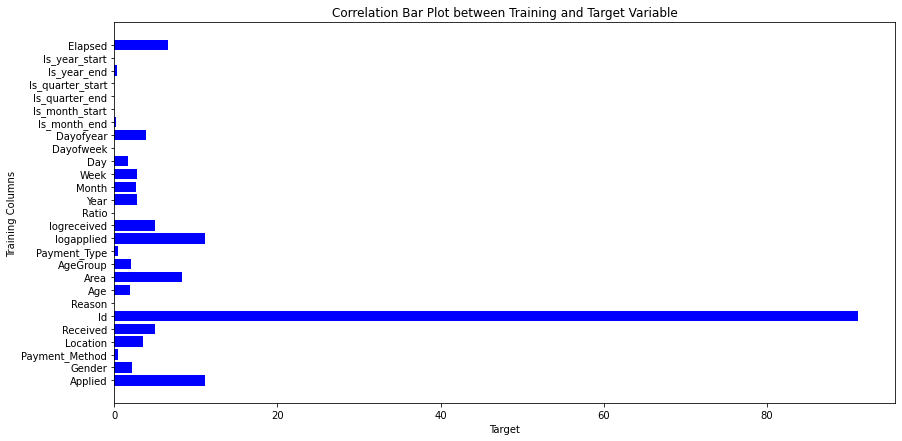

In [108]:
fig=pl.figure(figsize=(14,7))
pl.barh(cols,lst,color='b')
pl.ylabel("Training Columns")
pl.xlabel("Target")
pl.title("Correlation Bar Plot between Training and Target Variable")
pl.show()

### Correlation plot of each column with each other
##### The image has been cropped and import from the pandas profiling

In [109]:
from IPython.display import Image
Image(filename="Cramer'sV.PNG")

FileNotFoundError: [Errno 2] No such file or directory: "Cramer'sV.PNG"

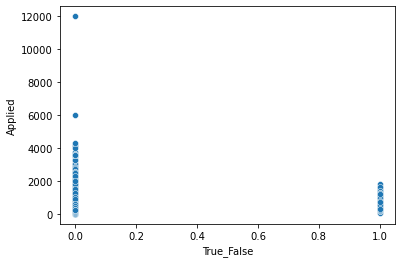

In [35]:
fig2=sns.scatterplot(x=data['True_False'],y=data['Applied'])

#### Checking Bias in target data

In [163]:
data['True_False'].value_counts()

0    113707
1       437
Name: True_False, dtype: int64

In [164]:
data1=data.copy()

In [219]:
#del data1['Date']
del data1['Gender']
del data1['Id']
del data1['Applied']
del data1['Received']
del data1['Age']
del data1['Reason']
del data1['Payment_Method']
## Removed highly correlated KPIS
#del data1["Week_Of_Month"]
#del data1["Week_Of_Year"]
del data1['logreceived']
del data1['Ratio']
del data1['Dayofweek']
del data1['Dayofyear']
del data1['Is_month_end']
del data1['Is_month_start']
del data1['Is_quarter_end']
del data1['Is_quarter_start']
del data1['Is_year_end']
del data1['Is_year_start']

KeyError: 'Gender'

### Getting dummy variables

In [220]:
dataf=data1.copy()

In [221]:
data1

Location Area  True_False AgeGroup Payment_Type  logapplied  Year  \
0             M    T           0    Adult           AV    4.553877  2020   
1             U    O           0    Adult           AV    4.499810  2020   
2             M    O           0    Adult           AV    4.442651  2020   
3             M    W           0   MidAge           AV    6.052089  2019   
4             M    C           0    Adult           AV    6.109248  2017   
...         ...  ...         ...      ...          ...         ...   ...   
114139        M   BP           0    Adult           AV    5.347108  2017   
114140        M   EC           0    Adult           AV    6.173786  2020   
114141        O   AM           0   MidAge           AV    5.840642  2017   
114142       NE    W           0      Old           AV    5.393628  2017   
114143       PP    O           0    Adult           AV    5.420535  2019   

        Month  Week  Day  Dayofyear     Elapsed  
0          10    42   16        290  1602806400  
1           5    20   13        134  1589328000  
2           9    40   29        273  1601337600  
3           7    28   10        191  1562716800  
4           9    38   18        261  1505692800  
...       ...   ...  ...        ...         ...  
114139      9    36    8        251  1504828800  
114140     10    44   27        301  1603756800  
114141      2     9   28         59  1488240000  
114142      8    35   28        240  1503878400  
114143     10    44   30        303  1572393600  

[114144 rows x 12 columns]

In [222]:
data1["Location"].unique()

array(['M', 'U', 'O', 'NE', 'PP'], dtype=object)

In [223]:
dataf=pd.get_dummies(dataf,drop_first=True)

In [224]:
dataf

True_False  logapplied  Year  Month  Week  Day  Dayofyear     Elapsed  \
0                0    4.553877  2020     10    42   16        290  1602806400   
1                0    4.499810  2020      5    20   13        134  1589328000   
2                0    4.442651  2020      9    40   29        273  1601337600   
3                0    6.052089  2019      7    28   10        191  1562716800   
4                0    6.109248  2017      9    38   18        261  1505692800   
...            ...         ...   ...    ...   ...  ...        ...         ...   
114139           0    5.347108  2017      9    36    8        251  1504828800   
114140           0    6.173786  2020     10    44   27        301  1603756800   
114141           0    5.840642  2017      2     9   28         59  1488240000   
114142           0    5.393628  2017      8    35   28        240  1503878400   
114143           0    5.420535  2019     10    44   30        303  1572393600   

        Location_NE  Location_O  ...  Area_NL  Area_O  Area_S  Area_T  Area_W  \
0                 0           0  ...        0       0       0       1       0   
1                 0           0  ...        0       1       0       0       0   
2                 0           0  ...        0       1       0       0       0   
3                 0           0  ...        0       0       0       0       1   
4                 0           0  ...        0       0       0       0       0   
...             ...         ...  ...      ...     ...     ...     ...     ...   
114139            0           0  ...        0       0       0       0       0   
114140            0           0  ...        0       0       0       0       0   
114141            0           1  ...        0       0       0       0       0   
114142            1           0  ...        0       0       0       0       1   
114143            0           0  ...        0       1       0       0       0   

        Area_Wlg  AgeGroup_MidAge  AgeGroup_Old  AgeGroup_Teenage  \
0              0                0             0                 0   
1              0                0             0                 0   
2              0                0             0                 0   
3              0                1             0                 0   
4              0                0             0                 0   
...          ...              ...           ...               ...   
114139         0                0             0                 0   
114140         0                0             0                 0   
114141         0                1             0                 0   
114142         0                0             1                 0   
114143         0                0             0                 0   

        Payment_Type_RPU  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  
...                  ...  
114139                 0  
114140                 0  
114141                 0  
114142                 0  
114143                 0  

[114144 rows x 26 columns]

# Creating the model

## Test Train Split

In [225]:
dataf.columns

Index(['True_False', 'logapplied', 'Year', 'Month', 'Week', 'Day', 'Dayofyear',
       'Elapsed', 'Location_NE', 'Location_O', 'Location_PP', 'Location_U',
       'Area_BP', 'Area_C', 'Area_EC', 'Area_N', 'Area_NL', 'Area_O', 'Area_S',
       'Area_T', 'Area_W', 'Area_Wlg', 'AgeGroup_MidAge', 'AgeGroup_Old',
       'AgeGroup_Teenage', 'Payment_Type_RPU'],
      dtype='object')

In [226]:
X1, y1 = dataf.drop(["True_False"],axis =1),dataf[['True_False']]

In [227]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, stratify = y1, test_size=0.20, random_state=0)

In [228]:
X1

logapplied  Year  Month  Week  Day  Dayofyear     Elapsed  \
0         4.553877  2020     10    42   16        290  1602806400   
1         4.499810  2020      5    20   13        134  1589328000   
2         4.442651  2020      9    40   29        273  1601337600   
3         6.052089  2019      7    28   10        191  1562716800   
4         6.109248  2017      9    38   18        261  1505692800   
...            ...   ...    ...   ...  ...        ...         ...   
114139    5.347108  2017      9    36    8        251  1504828800   
114140    6.173786  2020     10    44   27        301  1603756800   
114141    5.840642  2017      2     9   28         59  1488240000   
114142    5.393628  2017      8    35   28        240  1503878400   
114143    5.420535  2019     10    44   30        303  1572393600   

        Location_NE  Location_O  Location_PP  ...  Area_NL  Area_O  Area_S  \
0                 0           0            0  ...        0       0       0   
1                 0           0            0  ...        0       1       0   
2                 0           0            0  ...        0       1       0   
3                 0           0            0  ...        0       0       0   
4                 0           0            0  ...        0       0       0   
...             ...         ...          ...  ...      ...     ...     ...   
114139            0           0            0  ...        0       0       0   
114140            0           0            0  ...        0       0       0   
114141            0           1            0  ...        0       0       0   
114142            1           0            0  ...        0       0       0   
114143            0           0            1  ...        0       1       0   

        Area_T  Area_W  Area_Wlg  AgeGroup_MidAge  AgeGroup_Old  \
0            1       0         0                0             0   
1            0       0         0                0             0   
2            0       0         0                0             0   
3            0       1         0                1             0   
4            0       0         0                0             0   
...        ...     ...       ...              ...           ...   
114139       0       0         0                0             0   
114140       0       0         0                0             0   
114141       0       0         0                1             0   
114142       0       1         0                0             1   
114143       0       0         0                0             0   

        AgeGroup_Teenage  Payment_Type_RPU  
0                      0                 0  
1                      0                 0  
2                      0                 0  
3                      0                 0  
4                      0                 0  
...                  ...               ...  
114139                 0                 0  
114140                 0                 0  
114141                 0                 0  
114142                 0                 0  
114143                 0                 0  

[114144 rows x 25 columns]

In [314]:
X1.columns

Index(['logapplied', 'Year', 'Month', 'Week', 'Day', 'Dayofyear', 'Elapsed',
       'Location_NE', 'Location_O', 'Location_PP', 'Location_U', 'Area_BP',
       'Area_C', 'Area_EC', 'Area_N', 'Area_NL', 'Area_O', 'Area_S', 'Area_T',
       'Area_W', 'Area_Wlg', 'AgeGroup_MidAge', 'AgeGroup_Old',
       'AgeGroup_Teenage', 'Payment_Type_RPU'],
      dtype='object')

In [229]:
from sklearn .preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [230]:
import pickle
filename = 'scaler1.sav'
pickle.dump(sc, open(filename, 'wb'))

## Smote
###### Since there is a high difference in data we have to balance the dataset using smote

In [231]:
import imblearn
print(imblearn.__version__)
from imblearn.over_sampling import SMOTE

0.8.0


In [232]:
dataf.columns

Index(['True_False', 'logapplied', 'Year', 'Month', 'Week', 'Day', 'Dayofyear',
       'Elapsed', 'Location_NE', 'Location_O', 'Location_PP', 'Location_U',
       'Area_BP', 'Area_C', 'Area_EC', 'Area_N', 'Area_NL', 'Area_O', 'Area_S',
       'Area_T', 'Area_W', 'Area_Wlg', 'AgeGroup_MidAge', 'AgeGroup_Old',
       'AgeGroup_Teenage', 'Payment_Type_RPU'],
      dtype='object')

In [233]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train,y_train)

In [234]:
type(X_train)

numpy.ndarray

In [235]:
y_train['True_False'].value_counts()

1    90965
0    90965
Name: True_False, dtype: int64

In [236]:
y_test['True_False'].value_counts()

0    22742
1       87
Name: True_False, dtype: int64

# Logistic Regression

In [237]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train, y_train)

In [238]:
y_pred=clf.predict(X_test)

In [239]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      0.78      0.88     22742
     class 1       0.02      0.89      0.03        87

    accuracy                           0.79     22829
   macro avg       0.51      0.83      0.45     22829
weighted avg       1.00      0.79      0.88     22829



In [240]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[17849  4893]
 [   10    77]]


0.7852293135923606

#### After Parameter Tuning using Grid Search CV

In [241]:
from sklearn.model_selection import GridSearchCV
grid_values = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}

lr = LogisticRegression(random_state = 5,max_iter=2000,solver='lbfgs',class_weight={0:1, 1:10})
classifier=GridSearchCV(lr,grid_values,cv=10,n_jobs = 4, verbose = 2)
classifier.fit(X_train, y_train)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


GridSearchCV(cv=10,
             estimator=LogisticRegression(class_weight={0: 1, 1: 10},
                                          max_iter=2000, random_state=5),
             n_jobs=4,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             verbose=2)

In [242]:
print("tuned hpyerparameters :(best parameters) ",classifier.best_params_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2'}


In [243]:
print("accuracy :",classifier.best_score_)

accuracy : 0.8117407794206564


In [244]:
classifier2=LogisticRegression(C=1,penalty="l2",random_state = 5,max_iter=2000, class_weight={0:1, 1:10},solver='lbfgs')
classifier2.fit(X_train,y_train)

LogisticRegression(C=1, class_weight={0: 1, 1: 10}, max_iter=2000,
                   random_state=5)

In [245]:
y_pred1 = classifier2.predict(X_test)

In [324]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred1, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      0.63      0.77     22742
     class 1       0.01      0.97      0.02        87

    accuracy                           0.63     22829
   macro avg       0.50      0.80      0.39     22829
weighted avg       1.00      0.63      0.77     22829



In [246]:
y_pred_probability=classifier2.predict_proba(X_test)
y_pred_probability

array([[2.18922992e-01, 7.81077008e-01],
       [9.47503946e-01, 5.24960542e-02],
       [9.99989542e-01, 1.04582998e-05],
       ...,
       [9.99812133e-01, 1.87866685e-04],
       [2.12425736e-01, 7.87574264e-01],
       [9.85475368e-01, 1.45246317e-02]])

In [247]:
y_pred_probability[:,1]>0.4

array([ True, False, False, ..., False,  True, False])

In [248]:
new_pred=y_pred_probability[:,1]>0.6

In [249]:
print(classification_report(y_test, new_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      0.66      0.80     22742
     class 1       0.01      0.97      0.02        87

    accuracy                           0.66     22829
   macro avg       0.51      0.81      0.41     22829
weighted avg       1.00      0.66      0.79     22829



In [250]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, new_pred)
print(cm)
accuracy_score(y_test, new_pred)*100

[[15018  7724]
 [    3    84]]


66.15270051250603

In [251]:
d = y_test.copy()
d["lr_pred"] = pd.Series(new_pred, index = y_test.index)

In [252]:
d[(d["True_False"] == 0) & (d["lr_pred"] == 0)]

True_False  lr_pred
52537            0    False
87653            0    False
96885            0    False
62117            0    False
52266            0    False
...            ...      ...
36721            0    False
7071             0    False
96897            0    False
109448           0    False
102952           0    False

[15018 rows x 2 columns]

#### Feature Importance

In [205]:
pip install eli5

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: eli5 in c:\users\deban\anaconda3\lib\site-packages (0.11.0)



In [253]:
import eli5
from eli5.sklearn import PermutationImportance

In [254]:
perm = PermutationImportance(classifier2).fit(X_test, y_test)
eli5.show_weights(perm)

In [255]:
perm.feature_importances_

array([ 4.63270402e-02,  2.51697402e-02,  9.11997897e-02,  1.07582461e-02,
        2.80695606e-02,  9.37053747e-02,  3.20732402e-02,  5.51929563e-04,
       -9.02361032e-04,  3.41670682e-04, -7.00862937e-05,  1.20898857e-02,
        4.50742477e-02,  1.70572517e-02,  1.07232029e-02,  1.45691883e-02,
        6.29112094e-02,  2.21297473e-02,  2.37504928e-02,  1.60848044e-02,
        1.69608831e-02,  1.05129441e-04, -2.48806343e-03, -1.83976521e-04,
        3.56564019e-03])

In [256]:
fi = pd.DataFrame(data = perm.feature_importances_, index = X1.columns)

In [257]:
# Removing Location_NE, Applied, Age_17, Is_month_end, Is_year_end, Is_quarter_end, Is_quarter_start should improve the results

In [258]:
fi.sort_values(by = 0)

0
AgeGroup_Old     -0.002488
Location_O       -0.000902
AgeGroup_Teenage -0.000184
Location_U       -0.000070
AgeGroup_MidAge   0.000105
Location_PP       0.000342
Location_NE       0.000552
Payment_Type_RPU  0.003566
Area_N            0.010723
Week              0.010758
Area_BP           0.012090
Area_NL           0.014569
Area_W            0.016085
Area_Wlg          0.016961
Area_EC           0.017057
Area_S            0.022130
Area_T            0.023750
Year              0.025170
Day               0.028070
Elapsed           0.032073
Area_C            0.045074
logapplied        0.046327
Area_O            0.062911
Month             0.091200
Dayofyear         0.093705

Feature: 0, Score: 1.30640
Feature: 1, Score: 0.57417
Feature: 2, Score: 7.43494
Feature: 3, Score: -0.19037
Feature: 4, Score: 0.57770
Feature: 5, Score: -7.16161
Feature: 6, Score: -0.67476
Feature: 7, Score: -0.42449
Feature: 8, Score: -0.30437
Feature: 9, Score: 0.01068
Feature: 10, Score: -0.03026
Feature: 11, Score: -0.59538
Feature: 12, Score: -1.36595
Feature: 13, Score: -1.87545
Feature: 14, Score: -1.46502
Feature: 15, Score: -0.70135
Feature: 16, Score: -0.79769
Feature: 17, Score: -2.11792
Feature: 18, Score: -2.24265
Feature: 19, Score: -0.54271
Feature: 20, Score: -1.95441
Feature: 21, Score: -0.02381
Feature: 22, Score: -0.50684
Feature: 23, Score: -0.61956
Feature: 24, Score: -0.31795


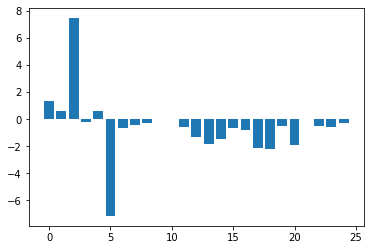

In [259]:
importance = clf.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pl.bar([x for x in range(len(importance))], importance)
pl.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.885


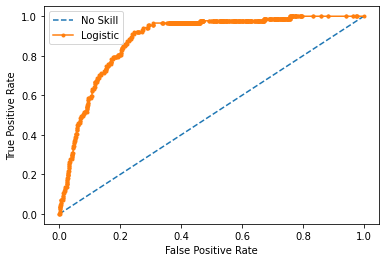

In [260]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = y_pred_probability[:,1]
# keep probabilities for the positive outcome only
#lr_probs = lr_probs[lr_probs>0]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pl.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pl.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
# show the legend
pl.legend()
# show the plot
pl.show()

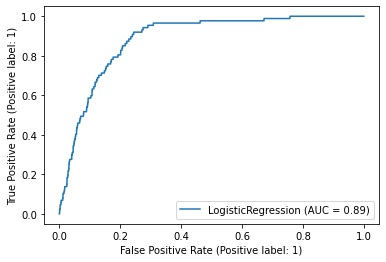

In [261]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier2,X_test,y_test)

#### Saving the model to use later

In [262]:
import pickle
filename = 'LR_trained_model.sav'
pickle.dump(classifier2, open(filename, 'wb'))

# Decision Tree Classifier

In [263]:
from sklearn.tree import DecisionTreeClassifier
clf_DT = DecisionTreeClassifier(random_state=0, class_weight = {1:100, 0:1}).fit(X_train, y_train)

In [264]:
y_pred_dt=clf_DT.predict(X_test)
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_dt, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      0.99      0.99     22742
     class 1       0.08      0.17      0.11        87

    accuracy                           0.99     22829
   macro avg       0.54      0.58      0.55     22829
weighted avg       0.99      0.99      0.99     22829



In [265]:
from sklearn.model_selection import GridSearchCV
params={'max_leaf_nodes':list(range(2,100)),'min_samples_split':[2,3,4]}
dct = DecisionTreeClassifier(random_state = 5, class_weight = {1:100, 0:1})
classifier3=GridSearchCV(dct,params,verbose=1,cv=3, n_jobs=4)
classifier3.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight={0: 1, 1: 100},
                                              random_state=5),
             n_jobs=4,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [266]:
print("tuned hyperparameters :(best parameters) ",classifier3.best_estimator_)

tuned hyperparameters :(best parameters)  DecisionTreeClassifier(class_weight={0: 1, 1: 100}, max_leaf_nodes=99,
                       random_state=5)


In [267]:
classifier3.best_params_

{'max_leaf_nodes': 99, 'min_samples_split': 2}

In [268]:
classifier4=DecisionTreeClassifier(max_leaf_nodes=classifier3.best_params_['max_leaf_nodes'],
                                   min_samples_split = classifier3.best_params_['min_samples_split'], 
                                   random_state=5, class_weight = {1:100, 0:1})
classifier4.fit(X_train, y_train)        

DecisionTreeClassifier(class_weight={0: 1, 1: 100}, max_leaf_nodes=99,
                       random_state=5)

In [269]:
y_pred_dt2=classifier4.predict(X_test)
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_dt2, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      0.78      0.88     22742
     class 1       0.02      0.89      0.03        87

    accuracy                           0.78     22829
   macro avg       0.51      0.83      0.45     22829
weighted avg       1.00      0.78      0.87     22829



##### Feature Importances

Feature: 0, Score: 24.0235
Feature: 1, Score: 4.3572
Feature: 2, Score: 2.3845
Feature: 3, Score: 2.8072
Feature: 4, Score: 6.5042
Feature: 5, Score: 2.0782
Feature: 6, Score: 11.3274
Feature: 7, Score: 1.5018
Feature: 8, Score: 1.0065
Feature: 9, Score: 1.2719
Feature: 10, Score: 0.5048
Feature: 11, Score: 0.3444
Feature: 12, Score: 4.5566
Feature: 13, Score: 2.9203
Feature: 14, Score: 1.8679
Feature: 15, Score: 0.6119
Feature: 16, Score: 9.6732
Feature: 17, Score: 4.0912
Feature: 18, Score: 4.4230
Feature: 19, Score: 0.9925
Feature: 20, Score: 3.0151
Feature: 21, Score: 2.6068
Feature: 22, Score: 0.3919
Feature: 23, Score: 0.0906
Feature: 24, Score: 6.6475


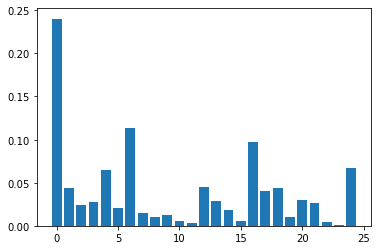

In [270]:
from matplotlib import pyplot
importance = clf_DT.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.4f' % (i,v*100))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [271]:
perm = PermutationImportance(classifier4).fit(X_test, y_test)
eli5.show_weights(perm)

In [272]:
fi = pd.DataFrame(data = perm.feature_importances_, index = X1.columns)

In [273]:
fi.sort_values(by = 0)

0
Location_NE      -4.730825e-04
Week             -3.416707e-04
AgeGroup_Old     -3.153883e-04
Day              -1.138902e-04
Location_PP      -6.132551e-05
AgeGroup_Teenage -2.628236e-05
Month            -8.760787e-06
AgeGroup_MidAge  -2.220446e-17
Dayofyear         1.752157e-05
Location_U        3.066275e-04
Payment_Type_RPU  4.205178e-04
Location_O        8.059924e-04
Area_N            7.691971e-03
Area_Wlg          1.251040e-02
Area_EC           1.265058e-02
Area_NL           1.283455e-02
Area_S            1.534014e-02
Area_BP           1.534890e-02
logapplied        1.800342e-02
Area_W            1.801218e-02
Area_O            1.828376e-02
Area_T            2.003592e-02
Area_C            3.521836e-02
Year              5.958211e-02
Elapsed           7.336283e-02

In [274]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred_dt2)
print(cm)
accuracy_score(y_test, y_pred_dt2)*100

[[17722  5020]
 [   10    77]]


77.96662140260196

In [275]:
from sklearn.metrics import plot_roc_curve

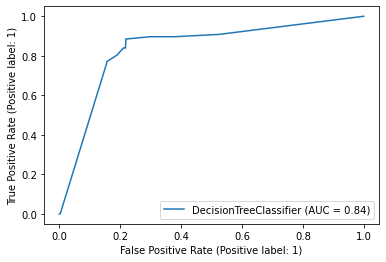

In [276]:
plot_roc_curve(classifier4, X_test, y_test)

In [277]:
import pickle
filename = 'Binary_Classifier_Training_Data.sav'
pickle.dump(classifier4, open(filename, 'wb'))

# Random Forest

In [278]:
X_train = pd.DataFrame(X_train, columns = X1.columns)

In [279]:
X_test = pd.DataFrame(X_test, columns =X1.columns)

In [280]:
'''
X_train.drop(["Received","Applied","logreceived","logapplied","Location_NE",
              "AgeGroup_Old","Age_30-34","Age_65+","Location_PP","Ratio",
              "AgeGroup_MidAge","Is_month_start","Location_O","Age_40-44",
              "Age_55-59","Is_year_end","Is_year_start","Payment_Method_U"], axis = 1, inplace = True)
'''

'\nX_train.drop(["Received","Applied","logreceived","logapplied","Location_NE",\n              "AgeGroup_Old","Age_30-34","Age_65+","Location_PP","Ratio",\n              "AgeGroup_MidAge","Is_month_start","Location_O","Age_40-44",\n              "Age_55-59","Is_year_end","Is_year_start","Payment_Method_U"], axis = 1, inplace = True)\n'

In [281]:
'''
X_test.drop(["Received","Applied","logreceived","logapplied","Location_NE",
              "AgeGroup_Old","Age_30-34","Age_65+","Location_PP","Ratio",
              "AgeGroup_MidAge","Is_month_start","Location_O","Age_40-44",
              "Age_55-59","Is_year_end","Is_year_start","Payment_Method_U"], axis = 1, inplace = True)
'''

'\nX_test.drop(["Received","Applied","logreceived","logapplied","Location_NE",\n              "AgeGroup_Old","Age_30-34","Age_65+","Location_PP","Ratio",\n              "AgeGroup_MidAge","Is_month_start","Location_O","Age_40-44",\n              "Age_55-59","Is_year_end","Is_year_start","Payment_Method_U"], axis = 1, inplace = True)\n'

In [282]:
from sklearn.ensemble import RandomForestClassifier
clf_RFT = RandomForestClassifier(class_weight = {1 : 100, 0:1})
clf_RFT.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 100})

In [283]:
y_pred_rft=clf_RFT.predict(X_test)
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_rft, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00     22742
     class 1       0.08      0.05      0.06        87

    accuracy                           0.99     22829
   macro avg       0.54      0.52      0.53     22829
weighted avg       0.99      0.99      0.99     22829



In [284]:
from sklearn.model_selection import GridSearchCV
params={'max_leaf_nodes':list(range(80,100,2)),'min_samples_split':[2,3,4]}
rdc = RandomForestClassifier(random_state = 5, class_weight = {1 : 100, 0:1})
classifier5=GridSearchCV(rdc,params,verbose=1,cv=3, n_jobs = 4)
classifier5.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight={0: 1, 1: 100},
                                              random_state=5),
             n_jobs=4,
             param_grid={'max_leaf_nodes': [80, 82, 84, 86, 88, 90, 92, 94, 96,
                                            98],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [285]:
print("tuned hyperparameters :(best parameters) ",classifier5.best_params_)

tuned hyperparameters :(best parameters)  {'max_leaf_nodes': 98, 'min_samples_split': 3}


In [286]:
classifier6=RandomForestClassifier(max_leaf_nodes=98, min_samples_split = 3, random_state=5, class_weight = {1 : 100, 0:1})
classifier6.fit(X_train, y_train)  

RandomForestClassifier(class_weight={0: 1, 1: 100}, max_leaf_nodes=98,
                       min_samples_split=3, random_state=5)

In [287]:
y_pred_rft=classifier6.predict(X_test)
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_rft, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      0.76      0.86     22742
     class 1       0.01      0.91      0.03        87

    accuracy                           0.76     22829
   macro avg       0.51      0.83      0.44     22829
weighted avg       1.00      0.76      0.86     22829



In [288]:
y_pred_prob = classifier6.predict_proba(X_test)

In [315]:
y_pred_40_pct_threshold = y_pred_prob[:,1] > 0.8

In [316]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred_40_pct_threshold, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      0.84      0.91     22742
     class 1       0.02      0.80      0.04        87

    accuracy                           0.84     22829
   macro avg       0.51      0.82      0.47     22829
weighted avg       1.00      0.84      0.91     22829



In [317]:
perm = PermutationImportance(classifier6).fit(X_test, y_test)
eli5.show_weights(perm)

In [318]:
fi = pd.DataFrame(data = perm.feature_importances_, index = X_train.columns)

In [319]:
fi.sort_values(by = 0)

0
AgeGroup_Old     -2.996189e-03
Location_NE      -1.156424e-03
Day              -4.906041e-04
AgeGroup_MidAge  -2.978667e-04
Week             -6.132551e-05
AgeGroup_Teenage  2.220446e-17
Location_PP       7.008629e-05
Month             2.978667e-04
Location_O        3.679530e-04
Location_U        3.767138e-04
Dayofyear         4.117570e-04
Payment_Type_RPU  4.468001e-04
Area_N            7.437908e-03
Area_W            1.088090e-02
Area_Wlg          1.272942e-02
logapplied        1.281703e-02
Area_EC           1.307985e-02
Area_NL           1.314994e-02
Year              1.344781e-02
Area_S            1.422752e-02
Area_BP           1.718866e-02
Area_O            1.812607e-02
Area_T            1.887073e-02
Elapsed           2.389943e-02
Area_C            3.345744e-02

Feature: 0, Score: 0.25171
Feature: 1, Score: 0.05831
Feature: 2, Score: 0.03671
Feature: 3, Score: 0.03401
Feature: 4, Score: 0.03992
Feature: 5, Score: 0.03101
Feature: 6, Score: 0.11237
Feature: 7, Score: 0.01566
Feature: 8, Score: 0.00561
Feature: 9, Score: 0.00526
Feature: 10, Score: 0.00133
Feature: 11, Score: 0.01079
Feature: 12, Score: 0.06728
Feature: 13, Score: 0.03781
Feature: 14, Score: 0.02235
Feature: 15, Score: 0.00920
Feature: 16, Score: 0.03875
Feature: 17, Score: 0.05273
Feature: 18, Score: 0.06180
Feature: 19, Score: 0.01246
Feature: 20, Score: 0.03836
Feature: 21, Score: 0.01884
Feature: 22, Score: 0.00903
Feature: 23, Score: 0.00135
Feature: 24, Score: 0.02735


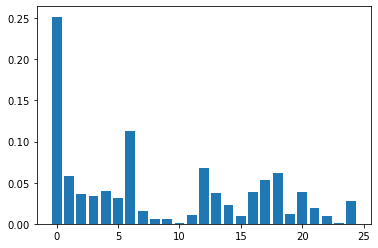

In [320]:
from matplotlib import pyplot
importance = classifier6.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [321]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred_rft)
print(cm)
accuracy_score(y_test, y_pred_rft)*100

[[17196  5546]
 [    8    79]]


75.67129528231635

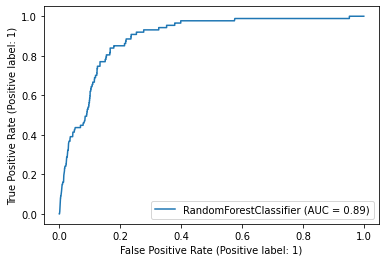

In [322]:
plot_roc_curve(classifier6, X_test, y_test)

In [323]:
import pickle
filename = 'Random_Forest_Classifier_Training_Data.sav'
pickle.dump(classifier6, open(filename, 'wb'))

## Voting Classifier

In [297]:
from sklearn.ensemble import VotingClassifier

##### Hard Voting

In [299]:
estimator=[]
estimator.append(('LR',classifier2))
estimator.append(('DTC',classifier4))
estimator.append(('RFC',classifier6))
vch = VotingClassifier(estimators=estimator, voting='hard')

In [301]:
vch.fit(X_train, y_train.values)

VotingClassifier(estimators=[('LR',
                              LogisticRegression(C=1,
                                                 class_weight={0: 1, 1: 10},
                                                 max_iter=2000,
                                                 random_state=5)),
                             ('DTC',
                              DecisionTreeClassifier(class_weight={0: 1,
                                                                   1: 100},
                                                     max_leaf_nodes=99,
                                                     random_state=5)),
                             ('RFC',
                              RandomForestClassifier(class_weight={0: 1,
                                                                   1: 100},
                                                     max_leaf_nodes=98,
                                                     min_samples_split=3,
                                         

In [303]:
y_pred_vote = vch.predict(X_test)

In [304]:
print(classification_report(y_test, y_pred_vote))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86     22742
           1       0.01      0.93      0.03        87

    accuracy                           0.75     22829
   macro avg       0.51      0.84      0.44     22829
weighted avg       1.00      0.75      0.85     22829



##### Soft Voting

In [305]:
estimator=[]
estimator.append(('LR',classifier2))
estimator.append(('DTC',classifier4))
estimator.append(('RFC',classifier6))
vcs = VotingClassifier(estimators=estimator, voting='soft')

In [306]:
vcs.fit(X_train, y_train.values)

VotingClassifier(estimators=[('LR',
                              LogisticRegression(C=1,
                                                 class_weight={0: 1, 1: 10},
                                                 max_iter=2000,
                                                 random_state=5)),
                             ('DTC',
                              DecisionTreeClassifier(class_weight={0: 1,
                                                                   1: 100},
                                                     max_leaf_nodes=99,
                                                     random_state=5)),
                             ('RFC',
                              RandomForestClassifier(class_weight={0: 1,
                                                                   1: 100},
                                                     max_leaf_nodes=98,
                                                     min_samples_split=3,
                                         

In [309]:
y_pred_vote2 = vcs.predict(X_test)

In [310]:
print(classification_report(y_test, y_pred_vote2))

              precision    recall  f1-score   support

           0       1.00      0.76      0.87     22742
           1       0.01      0.93      0.03        87

    accuracy                           0.76     22829
   macro avg       0.51      0.85      0.45     22829
weighted avg       1.00      0.76      0.86     22829



Either of the hard voting or soft voting can be saved as the diiference is not noticible. We are saving soft voting as recall and accuracy is slightly better than hard voting.

In [311]:
import pickle
filename = 'Voting_Classifier_Training_Data.sav'
pickle.dump(vcs, open(filename, 'wb'))

# The End.